In [4]:
using Turing
using StatsPlots
using Random

In [5]:
# Define a simple Normal model with unknown mean and variance.
@model function gdemo(x, y)
  s ~ InverseGamma(2, 3)
  m ~ Normal(0, sqrt(s))
  x ~ Normal(m, sqrt(s))
  y ~ Normal(m, sqrt(s))
end

#  Run sampler, collect results
chn = sample(gdemo(1.5, 2), HMC(0.1, 5), 1000)

# Summarise results
describe(chn)

# Plot and save results
p = plot(chn)
savefig("gdemo-plot.png")

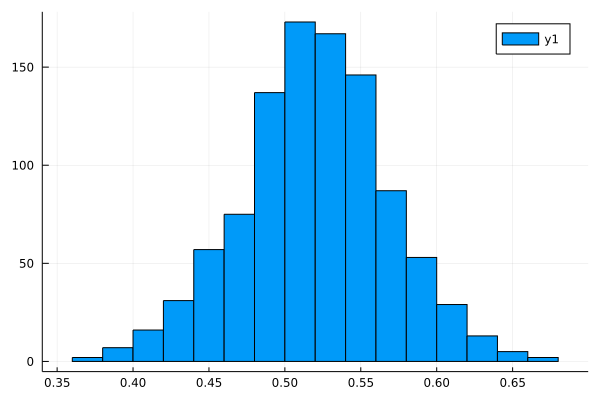

In [16]:
# Set the true probability of heads in a coin.
p_true = 0.5

# Iterate from having seen 0 observations to 100 observations.
Ns = 0:100

# Draw data from a Bernoulli distribution, i.e. draw heads or tails.
Random.seed!(12)
data = rand(Bernoulli(p_true), last(Ns))

# Declare our Turing model.
@model function coinflip(y)
    # Our prior belief about the probability of heads in a coin.
    p ~ Beta(1, 1)

    # The number of observations.
    N = length(y)
    for n in 1:N
        # Heads or tails of a coin are drawn from a Bernoulli distribution.
        y[n] ~ Bernoulli(p)
    end
end

# Settings of the Hamiltonian Monte Carlo (HMC) sampler.
iterations = 1000
ϵ = 0.05
τ = 10

# Start sampling.
chain = sample(coinflip(data), HMC(ϵ, τ), iterations)

# Plot a summary of the sampling process for the parameter p, i.e. the probability of heads in a coin.
histogram(chain[:p])